## 3차원 시각화 코드 ( 넘파이 )

In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in double_scalars
  return -11.286652959662*sqrt(pi)*erf((1/200)*sqrt(10)*x/sqrt(t)) + 50
<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return -11.286652959662*sqrt(pi)*erf((1/200)*sqrt(10)*x/sqrt(t)) + 50


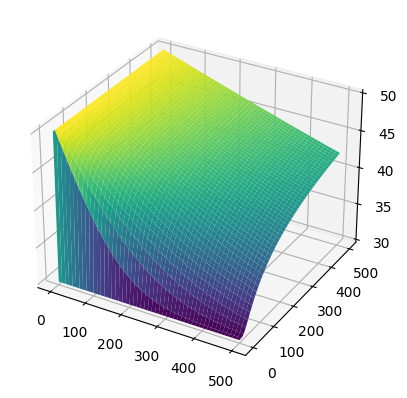

In [2]:
n = sy.Symbol("n")
x = sy.Symbol("x")
t = sy.Symbol("t")
a = 1000
Ti = 30
Ts = 50

integrate_expr = sy.integrate(sy.exp(-(n**2)))
result = integrate_expr.subs(n, n) - integrate_expr.subs(n, 0)
new_result = result.subs(n, x / (2 * (a * t)**(sy.Rational(1, 2))))
new_result = (Ti - Ts) * (2 / (3.14)**sy.Rational(1, 2)) * new_result + Ts

x_ = np.linspace(0, 500, 3000)
time = np.linspace(0, 500, 300)

x_, time = np.meshgrid(x_, time)

xx = x_.flatten()
tt = time.flatten()

# Numpy 배열로 변환
# result_func = sy.lambdify((x, t), new_result, modules=['numpy'])
# result_arr = result_func(xx, tt)
result_func = sy.lambdify((x, t), new_result, modules=['numpy'])
result_arr = np.vectorize(result_func)(xx, tt)
real_mat = np.real(result_arr).reshape(x_.shape)
imag_mat = np.imag(result_arr).reshape(x_.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_, time, real_mat, cmap='viridis')
plt.show()